In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import FID_util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_diffusion_image/"

## Data Sets

In [2]:
CIFAR_train_loader = DataLoader(datasets.CIFAR10('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True)

CIFAR_train = FID_util.load_data_single(CIFAR_train_loader, 10000, (32, 32))
CIFAR_generated = FID_util.load_from_dir("./diffusion_images/cifar_generated/*.png")
print(f"Base FID CIFAR-10: {FID_util.compute_FID(CIFAR_train, CIFAR_generated).item()}")

Files already downloaded and verified
Base FID CIFAR-10: 17.56197166442871


In [3]:
CelebA_train = FID_util.load_from_dir("./data/celeba_hq_256/*.jpg", seed)
CelebA_generated = FID_util.load_from_dir("./diffusion_images/celebA_generated/*.png")
print(f"Base FID CelebA-HQ DDIM: {FID_util.compute_FID(CelebA_train, CelebA_generated, batch_num=125).item()}")
CelebA_ldm_generated = FID_util.load_from_dir("./diffusion_images/celebA_ldm_generated/*.png")
print(f"Base FID CelebA-HQ LDM: {FID_util.compute_FID(CelebA_train, CelebA_ldm_generated, batch_num=125).item()}")

Base FID CelebA-HQ DDIM: 21.09842300415039
Base FID CelebA-HQ LDM: 25.89986801147461


## Sectional Rotations

CIFAR: 36.16896057128906


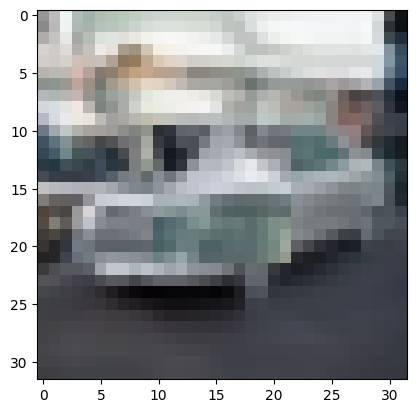

In [4]:
print(f"CIFAR: {FID_util.rotate_chunk((10, 10, 22, 22), CIFAR_train, CIFAR_generated)}")

CelebA DDIM: 88.92731475830078


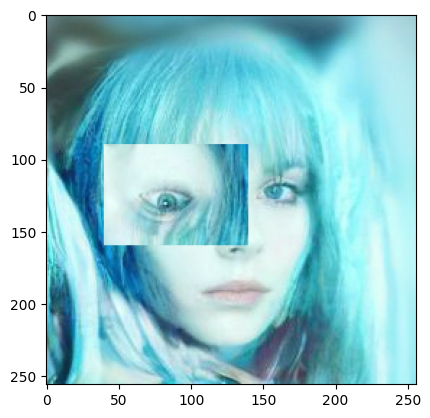

In [5]:
print(f"CelebA DDIM: {FID_util.rotate_chunk((40, 90, 140, 160), CelebA_train, CelebA_generated, batch_num=125)}")

CelebA LDM: 112.12126922607422


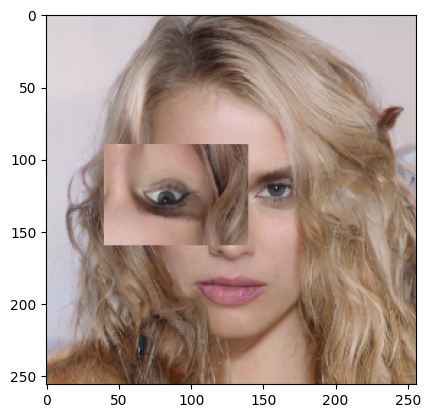

In [6]:
print(f"CelebA LDM: {FID_util.rotate_chunk((40, 90, 140, 160), CelebA_train, CelebA_ldm_generated, batch_num=125)}")

## Gaussian Blur

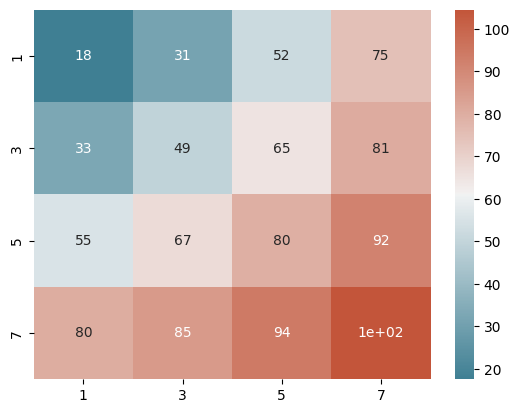

In [7]:
FID_util.generate_heatmap(CIFAR_train, CIFAR_generated, plot_path + "g_CIFAR_blurring_fid")

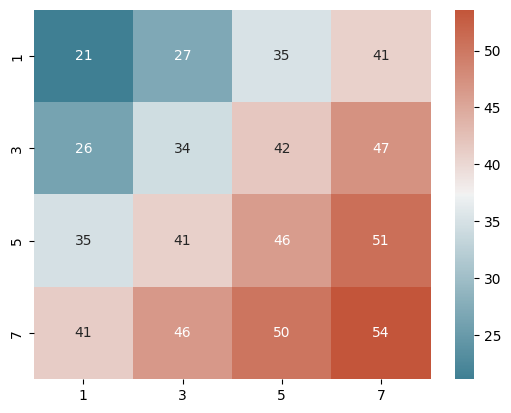

In [8]:
FID_util.generate_heatmap(CelebA_train, CelebA_generated, plot_path + "g_CelebA_blurring_fid")

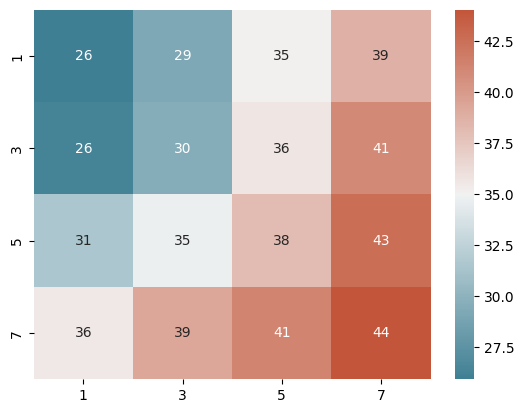

In [9]:
FID_util.generate_heatmap(CelebA_train, CelebA_ldm_generated, plot_path + "g_CelebA_ldm_blurring_fid")